###  Understand the Dataset Structure

In [46]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Datasets/enhanced_health_insurance_claims.csv")


In [3]:
df.head()

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod
0,10944daf-f7d5-4e1d-8216-72ffa609fe41,8552381d-7960-4f64-b190-b20b8ada00a1,4a4cb19c-4863-41cf-84b0-c2b21aace988,3807.95,2024-06-07,yy006,hd662,16,M,Cardiology,Pending,90279.43,Married,Retired,Jameshaven,Routine,Paper
1,fcbebb25-fc24-4c0f-a966-749edcf83fb1,327f43ad-e3bd-4473-a9ed-46483a0a156f,422e02dd-c1fd-43dd-8af4-0c3523f997b1,9512.07,2023-05-30,tD052,mH831,27,M,Pediatrics,Approved,130448.02,Single,Student,Beltrantown,Routine,Online
2,9e9983e7-9ea7-45f5-84d8-ce49ccd8a4a1,6f3acdf7-73aa-4afa-9c2e-b25b27bdb5b0,f7733b3f-0980-47b5-a7a0-ee390869355b,7346.74,2022-09-27,zx832,dg637,40,F,Cardiology,Pending,82417.54,Divorced,Employed,West Charlesport,Emergency,Online
3,a06273ed-44bb-452b-bbad-8618de080494,5d58e183-701e-406c-a8c6-5b73cac5e912,f7a04581-de96-44ee-b773-8adac02baa59,6026.72,2023-06-25,kr421,kG326,65,M,Neurology,Pending,68516.96,Widowed,Student,West Aprilhaven,Routine,Phone
4,f702a717-254b-4cff-a0c7-8395db2f6616,8a8ebdf6-3af0-4f14-82f3-37b937c3d270,b80b9e77-97f0-47d7-b561-19f9658a7bdf,1644.58,2023-07-24,LZ261,cx805,24,M,General Practice,Pending,84122.17,Married,Student,Lake Michele,Inpatient,Phone


In [4]:
df.tail() 

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod
4495,82ada51e-65cf-4a59-941f-ef6418021d32,5d0159c5-e5ce-4d0e-82cb-c4715d6d5471,00d92026-359c-47c4-8351-94470749a98c,6140.07,2023-04-07,mA872,VU132,57,M,Orthopedics,Approved,66383.51,Divorced,Student,Maryburgh,Inpatient,Phone
4496,fdc4f785-0c95-4356-a2a6-d835ba3514f0,fd66e4f7-a678-4d22-bdf7-72694ea041c0,6b6823f0-b5d2-4f94-8651-ededc9b0adb3,4932.96,2023-01-05,dn637,Tr490,62,M,Pediatrics,Pending,122988.21,Married,Employed,East Paulafort,Routine,Online
4497,e54522e3-d4c0-4067-a9a7-0c4f945d19c4,0a1506fb-68c3-4153-9d72-b01d1d0a6c1c,5d3b394f-d861-4778-951b-57783afa4c74,1418.50,2023-11-16,Zu983,Tb316,27,M,Pediatrics,Denied,118556.80,Married,Student,Ramirezhaven,Outpatient,Phone
4498,959cc9ab-52e9-4292-bb54-64da1f9c3a95,3cba92be-8544-43a4-8ff3-dc8c5244fffd,3d7a090c-d44f-4705-93af-0a07aa4d1fca,2687.20,2023-10-07,eo150,Wc232,64,M,Neurology,Denied,138379.63,Divorced,Retired,Port Jessica,Emergency,Paper
4499,f7681dee-6505-4b72-a578-3e86b7287a86,5e29f1d8-2ca7-4d76-908d-24cbf6b41137,95072963-a4e2-4c30-9961-59ecd6b33fbd,4249.08,2023-07-26,DY251,gn555,43,F,Neurology,Pending,21927.92,Divorced,Employed,New Kari,Emergency,Phone


In [5]:
df.shape 

(4500, 17)

In [6]:
df.columns  

Index(['ClaimID', 'PatientID', 'ProviderID', 'ClaimAmount', 'ClaimDate',
       'DiagnosisCode', 'ProcedureCode', 'PatientAge', 'PatientGender',
       'ProviderSpecialty', 'ClaimStatus', 'PatientIncome',
       'PatientMaritalStatus', 'PatientEmploymentStatus', 'ProviderLocation',
       'ClaimType', 'ClaimSubmissionMethod'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClaimID                  4500 non-null   object 
 1   PatientID                4500 non-null   object 
 2   ProviderID               4500 non-null   object 
 3   ClaimAmount              4500 non-null   float64
 4   ClaimDate                4500 non-null   object 
 5   DiagnosisCode            4500 non-null   object 
 6   ProcedureCode            4500 non-null   object 
 7   PatientAge               4500 non-null   int64  
 8   PatientGender            4500 non-null   object 
 9   ProviderSpecialty        4500 non-null   object 
 10  ClaimStatus              4500 non-null   object 
 11  PatientIncome            4500 non-null   float64
 12  PatientMaritalStatus     4500 non-null   object 
 13  PatientEmploymentStatus  4500 non-null   object 
 14  ProviderLocation        

In [8]:
df.isnull().sum()

ClaimID                    0
PatientID                  0
ProviderID                 0
ClaimAmount                0
ClaimDate                  0
DiagnosisCode              0
ProcedureCode              0
PatientAge                 0
PatientGender              0
ProviderSpecialty          0
ClaimStatus                0
PatientIncome              0
PatientMaritalStatus       0
PatientEmploymentStatus    0
ProviderLocation           0
ClaimType                  0
ClaimSubmissionMethod      0
dtype: int64

In [9]:
df.describe()

,ClaimAmount,PatientAge,PatientIncome
count,4500.000000,4500.000000,4500.000000
mean,5014.203867,49.838444,84384.284084
std,2866.291066,28.790471,37085.908878
min,100.120000,0.000000,20006.870000
25%,2509.072500,25.000000,52791.905000
50%,5053.765000,50.500000,84061.205000
75%,7462.452500,75.000000,115768.417500
max,9997.200000,99.000000,149957.520000


### Explore Categorical Features

In [ ]:
# PatientGender
df['PatientGender'].value_counts()
df['PatientGender'].unique()

array(['M', 'F'], dtype=object)

In [13]:
# ProviderSpecialty
df['ProviderSpecialty'].value_counts()
df['ProviderSpecialty'].unique()

array(['Cardiology', 'Pediatrics', 'Neurology', 'General Practice',
       'Orthopedics'], dtype=object)

In [14]:
# ClaimStatus
df['ClaimStatus'].value_counts()
df['ClaimStatus'].unique()

array(['Pending', 'Approved', 'Denied'], dtype=object)

In [15]:
# PatientMaritalStatus
df['PatientMaritalStatus'].value_counts()
df['PatientMaritalStatus'].unique()

array(['Married', 'Single', 'Divorced', 'Widowed'], dtype=object)

In [ ]:
# PatientEmploymentStatus
df['PatientEmploymentStatus'].value_counts()
df['PatientEmploymentStatus'].unique()

array(['Retired', 'Student', 'Employed', 'Unemployed'], dtype=object)

In [17]:
# ProviderLocation
df['ProviderLocation'].value_counts()
df['ProviderLocation'].unique()

array(['Jameshaven', 'Beltrantown', 'West Charlesport', ...,
       'Ramirezhaven', 'Port Jessica', 'New Kari'],
      shape=(3876,), dtype=object)

In [18]:
# ClaimType
df['ClaimType'].value_counts()
df['ClaimType'].unique()

array(['Routine', 'Emergency', 'Inpatient', 'Outpatient'], dtype=object)

In [19]:
# ClaimSubmissionMethod
df['ClaimSubmissionMethod'].value_counts()
df['ClaimSubmissionMethod'].unique()

array(['Paper', 'Online', 'Phone'], dtype=object)

In [22]:
categorical_cols = ['DiagnosisCode', 'ProcedureCode', 'PatientGender', 'ProviderSpecialty',
                    'ClaimStatus', 'PatientMaritalStatus', 'PatientEmploymentStatus',
                    'ProviderLocation', 'ClaimType', 'ClaimSubmissionMethod']

In [23]:
# Convert them to 'category' dtype
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [24]:
# Convert date column
df['ClaimDate'] = pd.to_datetime(df['ClaimDate'])

In [25]:
numeric_cols = ['ClaimAmount', 'PatientAge', 'PatientIncome']

In [ ]:
# Check unique values for categorical columns
for col in categorical_cols:
    print(col, df[col].nunique())    # might need grouping later

DiagnosisCode 4495
ProcedureCode 4495
PatientGender 2
ProviderSpecialty 5
ClaimStatus 3
PatientMaritalStatus 4
PatientEmploymentStatus 4
ProviderLocation 3876
ClaimType 4
ClaimSubmissionMethod 3


### Visualize the Data

# Understand distributions of numeric variables

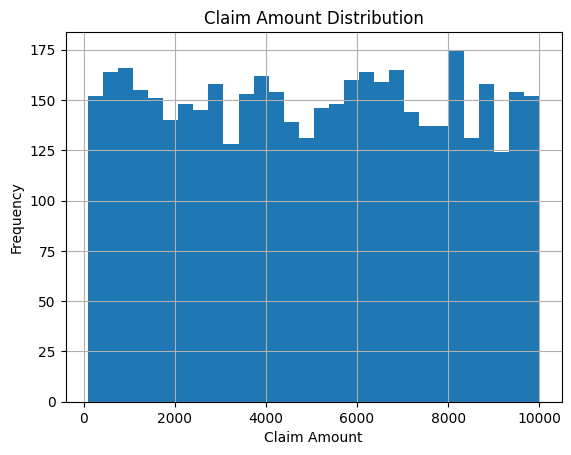

In [28]:
# Histogram
df['ClaimAmount'].hist(bins=30)
plt.title('Claim Amount Distribution')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()

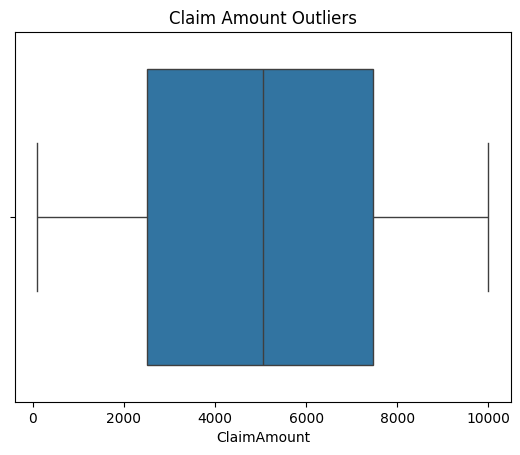

In [29]:
# Boxplot
sns.boxplot(x=df['ClaimAmount'])
plt.title('Claim Amount Outliers')
plt.show()

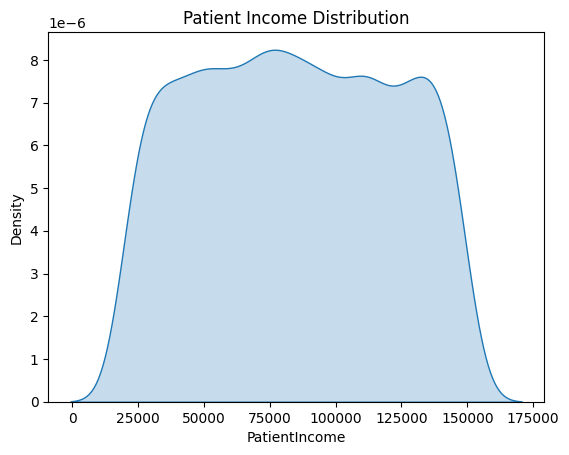

In [31]:
# Density plot
sns.kdeplot(df['PatientIncome'], fill=True)  # <-- use fill instead of shade
plt.title('Patient Income Distribution')
plt.show()

# Explore categorical variables

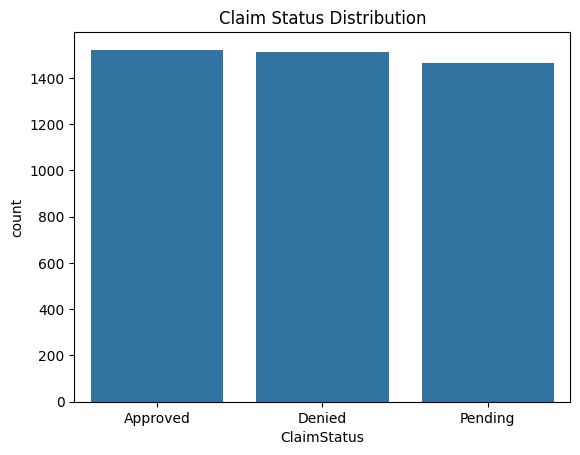

In [32]:
# Count plot for categorical column
sns.countplot(x='ClaimStatus', data=df)
plt.title('Claim Status Distribution')
plt.show()

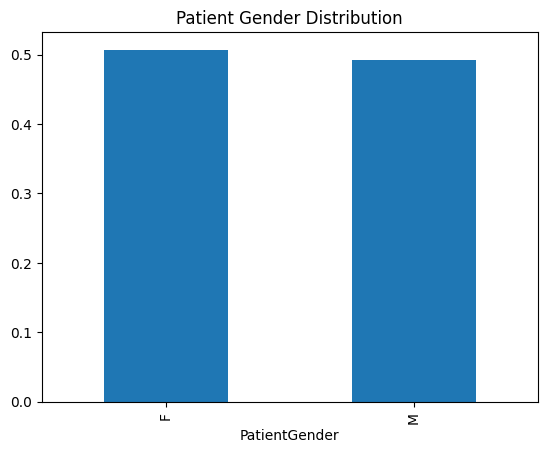

In [33]:
# Bar plot with percentages
df['PatientGender'].value_counts(normalize=True).plot(kind='bar')
plt.title('Patient Gender Distribution')
plt.show()

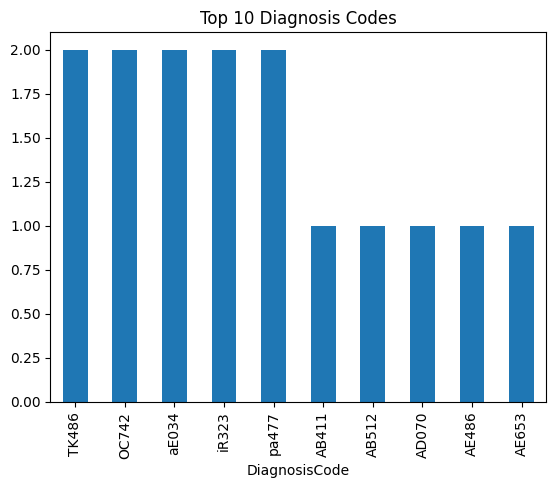

In [34]:
df['DiagnosisCode'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Diagnosis Codes')
plt.show()

### Explore relationships between variables

### Numeric vs Numeric

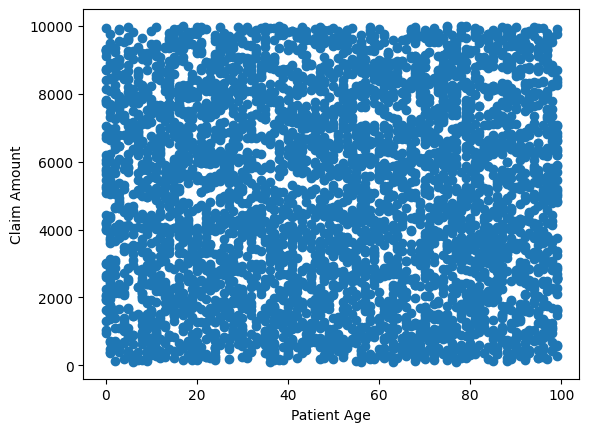

In [36]:
# Scatter plot check correlation
plt.scatter(df['PatientAge'], df['ClaimAmount'])
plt.xlabel('Patient Age')
plt.ylabel('Claim Amount')
plt.show()

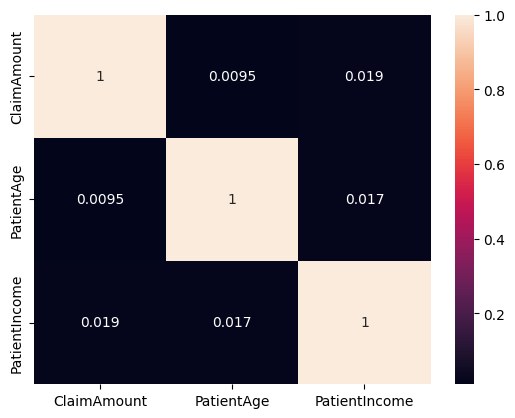

In [37]:
# Correlation heatmap / see linear relationships
sns.heatmap(df[['ClaimAmount','PatientAge','PatientIncome']].corr(), annot=True)
plt.show()

### Categorical vs Numeric
Boxplot → compare numeric distribution across categories

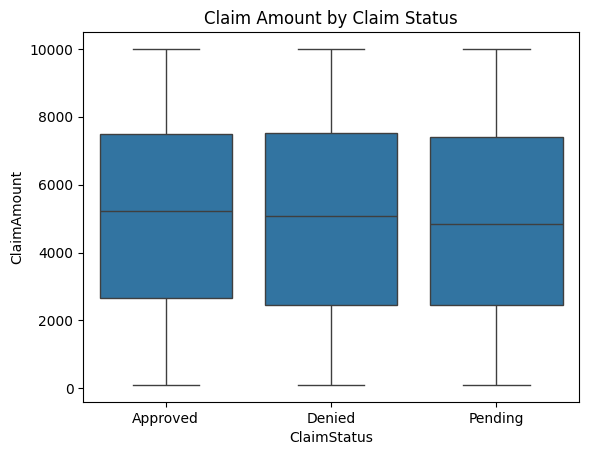

In [38]:
sns.boxplot(x='ClaimStatus', y='ClaimAmount', data=df)
plt.title('Claim Amount by Claim Status')
plt.show()

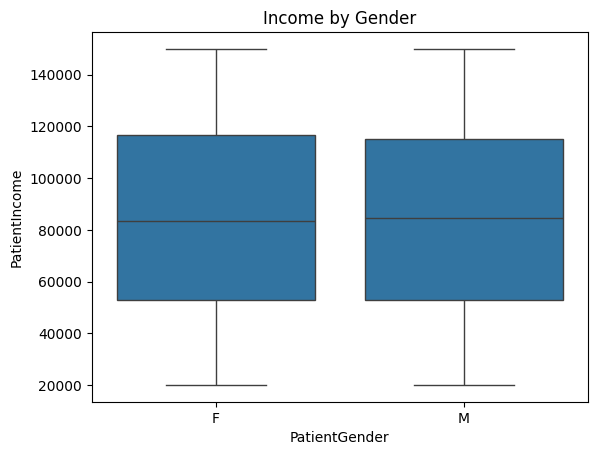

In [39]:
sns.boxplot(x='PatientGender', y='PatientIncome', data=df)
plt.title('Income by Gender')
plt.show()

### Time-based analysis
Column: ClaimDate

    Extract month/year/weekday for trends

    Use line plot to see claim volume over time

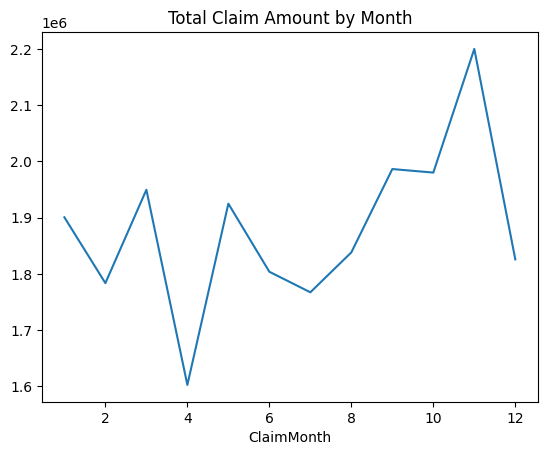

In [40]:
df['ClaimMonth'] = df['ClaimDate'].dt.month
df.groupby('ClaimMonth')['ClaimAmount'].sum().plot(kind='line')
plt.title('Total Claim Amount by Month')
plt.show()

### Outliers and unusual patterns

    Use boxplots for numeric variables

    Use heatmaps or scatter plots for high/low claim amounts by provider or patient

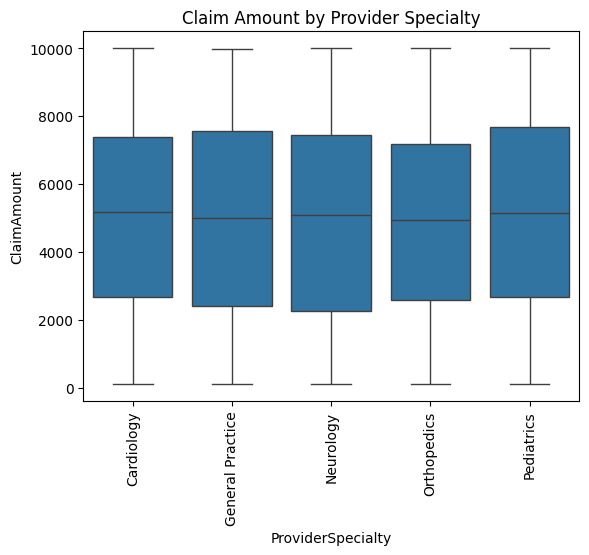

In [42]:
sns.boxplot(x='ProviderSpecialty', y='ClaimAmount', data=df)
plt.xticks(rotation=90)
plt.title('Claim Amount by Provider Specialty')
plt.show()

### Checking the correlation for this data set

In [43]:
# Correlation matrix
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

               ClaimAmount  PatientAge  PatientIncome
ClaimAmount       1.000000    0.009515       0.019128
PatientAge        0.009515    1.000000       0.017400
PatientIncome     0.019128    0.017400       1.000000


### Visualize correlation (heatmap)

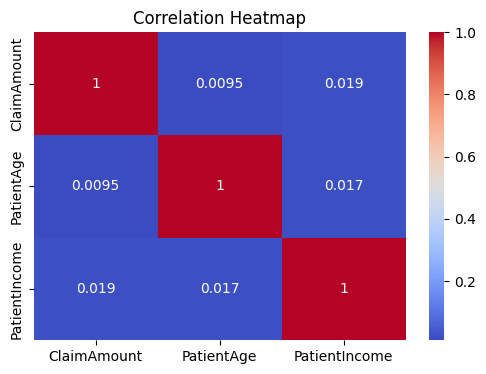

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Detecting Outliers

In [45]:
# Using IQR Method

outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} - Number of outliers: {outliers[col].shape[0]}")


ClaimAmount - Number of outliers: 0
PatientAge - Number of outliers: 0
PatientIncome - Number of outliers: 0


In [47]:
# Z-Score Method

for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers_z = df[z_scores > 3]  # Z > 3 is often considered outlier
    print(f"{col} - Number of outliers by Z-score: {outliers_z.shape[0]}")


ClaimAmount - Number of outliers by Z-score: 0
PatientAge - Number of outliers by Z-score: 0
PatientIncome - Number of outliers by Z-score: 0


### outliers in Categorical Columns

In [48]:
cat_cols = ['PatientGender','ClaimStatus','PatientMaritalStatus','PatientEmploymentStatus',
            'ProviderSpecialty','ProviderLocation','ClaimType','ClaimSubmissionMethod']

for col in cat_cols:
    freq = df[col].value_counts()
    rare = freq[freq < 5]  # Categories appearing less than 5 times
    print(f"Rare categories in {col}:")
    print(rare)

Rare categories in PatientGender:
Series([], Name: count, dtype: int64)
Rare categories in ClaimStatus:
Series([], Name: count, dtype: int64)
Rare categories in PatientMaritalStatus:
Series([], Name: count, dtype: int64)
Rare categories in PatientEmploymentStatus:
Series([], Name: count, dtype: int64)
Rare categories in ProviderSpecialty:
Series([], Name: count, dtype: int64)
Rare categories in ProviderLocation:
ProviderLocation
Jessicashire     4
Lake William     4
Lake David       4
Williamsville    4
New Jennifer     4
                ..
Adamtown         1
Adkinsside       1
Adkinsstad       1
Adrienneburgh    1
Yangfort         1
Name: count, Length: 3864, dtype: int64
Rare categories in ClaimType:
Series([], Name: count, dtype: int64)
Rare categories in ClaimSubmissionMethod:
Series([], Name: count, dtype: int64)
